# 분석 목표

- 여러 제조사별 무선청소기의 가격과 성능에 대한 데이터를 수집하고 분석하여 각각의 상황에 맞는 제품군 파악

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

# 데이터 수집

In [3]:
# 다나와에서 무선청소기 검색 -> url 복사
#url = 'https://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0' # 퍼센트 인코딩 (한글을 변환)
url = "https://search.danawa.com/dsearch.php?k1=무선청소기"
driver = webdriver.Chrome("chromedriver")
driver.get(url)
driver.implicitly_wait(3)
soup = BeautifulSoup(driver.page_source, "lxml")

In [4]:
# 상품명 , 스펙, 첫번째 위치의 가격 크롤링

In [5]:
prod_data = {"상품명" : [],
             "스펙목록" : [],
             "가격" : []}

In [6]:
prod_items = soup.select("li.prod_item div.prod_main_info")

In [7]:
# 상품명
prod_items[0].select_one("a.click_log_product_standard_title_").text.strip()

'LG전자 오브제컬렉션 코드제로 A9S AU9982'

In [8]:
# 스펙목록
prod_items[0].select_one("div.spec_list").text.strip()

'핸디스틱청소기\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t무선형\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t흡입+물걸레겸용\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t흡입력\n\t\t\t\t\t\t\t\t\t\t\t\t: \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t220W\n\t\t\t\t\t\t\t\t\t\t\t\t / [구성] 와이드바닥\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t스팀물걸레\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t침구\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t솔형\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t틈새\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t올인원타워\n\t\t\t\t\t\t\t\t\t\t\t\t / [배터리] 분리형 (2개)\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\

In [9]:
# 가격 정보
prod_items[0].select_one("a.click_log_product_standard_price_ > strong").text.strip().replace(",", "")

'1055510'

In [10]:
for prod_item in prod_items:
    if "product-pot" in prod_item["class"]:
        continue
        # 공백부분 제외하기
        
    try:
        # 상품명
        title = prod_item.select_one("a.click_log_product_standard_title_").text.strip()
        # 스펙 목록
        spec_list = prod_item.select_one("div.spec_list").text.strip()
        # 가격 정보
        price = prod_item.select_one("a.click_log_product_standard_price_ > strong").text.strip().replace(",", "")
        
        prod_data["상품명"].append(title)
        prod_data["스펙목록"].append(spec_list)
        prod_data["가격"].append(price)
        
    except:
        pass # 광고 등 에러가 발생하면 넘어가기

In [11]:
len(prod_data["상품명"])

40

In [12]:
prod_data["상품명"]

['LG전자 오브제컬렉션 코드제로 A9S AU9982',
 '다이슨 V10 플러피 오리진',
 '삼성전자 비스포크 제트 VS20B956AX',
 '샤오미 미지아 차량용 핸디 무선 청소기',
 '삼성전자 비스포크 제트 VS20A956A3',
 '일렉트로룩스 에르고라피도 ZB3512IG',
 'LG전자 코드제로 A9S AT9200BA',
 'LG전자 오브제컬렉션 코드제로 A9S AT9401WC',
 'LG전자 오브제컬렉션 코드제로 A9S AT9201WB',
 '삼성전자 비스포크 제트 VS20B956D5',
 '베이스어스 차량용 청소기 A3 (해외구매)',
 'LG전자 코드제로 A9S AT9270',
 '삼성전자 제트 VS20T92K0BF',
 '샤오미 드리미 V10',
 '한라홀딩스 만도 차량용 청소기 MC-100',
 'LG전자 코드제로 A9S AS9271',
 'LG전자 오브제컬렉션 코드제로 A9S AO9571',
 '다이슨 V15 디텍트 컴플리트',
 'LG전자 오브제컬렉션 코드제로 A9S AU9672WD',
 '삼성전자 비스포크 제트 VS20B957D4',
 '오아 클린듀얼 차량용 청소기 OCL-028BK',
 '리하스 차량용 미니 무선 청소기 TEB-4120',
 '조아스 차량용 듀얼 무선 에어건 청소기 JVC-3000',
 '샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)',
 '다이슨 V10 앱솔루트',
 '오아 클린보틀 차량용 청소기 OA-CL002',
 '다이슨 V12 디텍트 슬림 컴플리트',
 'DIBEA 차이슨 ALLNEW22000 스노우화이트',
 '캐치웰 차량용 핸디 텀블러 청소기 THC1000',
 '삼성전자 에어본 화이트 VC-H22',
 'LG전자 오브제컬렉션 코드제로 A9S AU9602WD',
 '삼성전자 비스포크 제트 VS20A956AVW',
 '오아 클린벨 핸디 미니 차량용 청소기',
 '로리스토어 알파플랜 차량용 무선 에어건 청소기 ACV01',
 'LG전자 코드제로 A9S AT9271',
 'LG전자 오브제

In [13]:
# 10페이지까지 반복
prod_data = {"상품명" : [],
             "스펙목록" : [],
             "가격" : []}

driver = webdriver.Chrome("chromedriver")

for i in range(1, 11):
    url = "https://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=10325109&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2944&defaultVaTab=620897&tab=goods&page="
    driver.get(url + str(i))
    driver.implicitly_wait(3)
    soup = BeautifulSoup(driver.page_source, "lxml")
    
    prod_items = soup.select("li.prod_item div.prod_main_info")
    
    for prod_item in prod_items:
        if "product-pot" in prod_item["class"]:
            continue
            # 공백부분 제외하기

        try:
            # 상품명
            title = prod_item.select_one("a.click_log_product_standard_title_").text.strip()
            # 스펙 목록
            spec_list = prod_item.select_one("div.spec_list").text.strip()
            # 가격 정보
            price = prod_item.select_one("a.click_log_product_standard_price_ > strong").text.strip().replace(",", "")

            prod_data["상품명"].append(title)
            prod_data["스펙목록"].append(spec_list)
            prod_data["가격"].append(price)

        except:
            pass # 광고 등 에러가 발생하면 넘어가기

In [14]:
prod_data["상품명"]

['LG전자 오브제컬렉션 코드제로 A9S AU9982',
 '다이슨 V10 플러피 오리진',
 '삼성전자 비스포크 제트 VS20B956AX',
 '샤오미 미지아 차량용 핸디 무선 청소기',
 '삼성전자 비스포크 제트 VS20A956A3',
 '일렉트로룩스 에르고라피도 ZB3512IG',
 'LG전자 코드제로 A9S AT9200BA',
 'LG전자 오브제컬렉션 코드제로 A9S AT9401WC',
 'LG전자 오브제컬렉션 코드제로 A9S AT9201WB',
 '삼성전자 비스포크 제트 VS20B956D5',
 '베이스어스 차량용 청소기 A3 (해외구매)',
 'LG전자 코드제로 A9S AT9270',
 '삼성전자 제트 VS20T92K0BF',
 '샤오미 드리미 V10',
 '한라홀딩스 만도 차량용 청소기 MC-100',
 'LG전자 코드제로 A9S AS9271',
 'LG전자 오브제컬렉션 코드제로 A9S AO9571',
 '다이슨 V15 디텍트 컴플리트',
 'LG전자 오브제컬렉션 코드제로 A9S AU9672WD',
 '삼성전자 비스포크 제트 VS20B957D4',
 '오아 클린듀얼 차량용 청소기 OCL-028BK',
 '리하스 차량용 미니 무선 청소기 TEB-4120',
 '조아스 차량용 듀얼 무선 에어건 청소기 JVC-3000',
 '샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)',
 '다이슨 V10 앱솔루트',
 '오아 클린보틀 차량용 청소기 OA-CL002',
 '다이슨 V12 디텍트 슬림 컴플리트',
 'DIBEA 차이슨 ALLNEW22000 스노우화이트',
 '캐치웰 차량용 핸디 텀블러 청소기 THC1000',
 '삼성전자 에어본 화이트 VC-H22',
 'LG전자 오브제컬렉션 코드제로 A9S AU9602WD',
 '삼성전자 비스포크 제트 VS20A956AVW',
 '오아 클린벨 핸디 미니 차량용 청소기',
 '로리스토어 알파플랜 차량용 무선 에어건 청소기 ACV01',
 'LG전자 코드제로 A9S AT9271',
 'LG전자 오브제

In [15]:
len(prod_data["상품명"])

400

# 데이터 전처리

## 데이터 확인

In [16]:
df = pd.DataFrame(prod_data)

In [17]:
df.head()

,상품명,스펙목록,가격
0,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t...,1055510
1,다이슨 V10 플러피 오리진,핸디스틱청소기\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t...,404100
2,삼성전자 비스포크 제트 VS20B956AX,핸디스틱청소기\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t...,519000
3,샤오미 미지아 차량용 핸디 무선 청소기,차량용청소기 / \t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,48000
4,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기\n\t\t\t\t\t\t\t\t\t\t\t\t / \t\t\t\t\t...,435080


In [18]:
df.loc[0, "스펙목록"].replace("\n", "").replace("\t", "").replace(" ", "")

'핸디스틱청소기/무선형/흡입+물걸레겸용/흡입력:220W/[구성]와이드바닥/스팀물걸레/침구/솔형/틈새/올인원타워/[배터리]분리형(2개)/충전시간:4시간/사용시간(개당):1시간/[성능]스마트인버터모터/헤파필터/5단계여과/[기능]IoT기능/디스플레이표시창/자동물공급/LED라이트/자동먼지비움/[부가]색상:카밍베이지/무게:2.7kg/크기(가로x세로x깊이):300x1120x260mm'

In [19]:
def clean_text(text):
    text = text.replace("\n", "")
    text = text.replace("\t", "")
    text = text.replace(" ", "")
    return text

In [20]:
df["스펙목록"] = df["스펙목록"].map(clean_text)

In [21]:
df.head()

,상품명,스펙목록,가격
0,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기/무선형/흡입+물걸레겸용/흡입력:220W/[구성]와이드바닥/스팀물걸레/...,1055510
1,다이슨 V10 플러피 오리진,핸디스틱청소기/무선형/흡입전용/흡입력:151AW/[구성]소프트롤러/미니모터/솔형/더...,404100
2,삼성전자 비스포크 제트 VS20B956AX,핸디스틱청소기/무선형/흡입전용/흡입력:220W/[구성]바닥/솔형/틈새/연장툴/청정스...,519000
3,샤오미 미지아 차량용 핸디 무선 청소기,"차량용청소기/무선/흡입력:13,000Pa/최대출력:120W/헤파필터/추가노즐:틈새,...",48000
4,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기/무선형/흡입전용/흡입력:210W/[구성]바닥/솔형/틈새/연장툴/청정스...,435080


In [22]:
df.shape

(400, 3)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙목록    400 non-null    object
 2   가격      400 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [24]:
df["가격"] = df["가격"].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙목록    400 non-null    object
 2   가격      400 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 7.9+ KB


## 회사명, 모델명 정리

- 상품명 데이터는 회사명 + 모델명의 형식임
    - 브랜드와 모델명으로 분리

In [26]:
df.iloc[0, 0].split(" ", 1) # 첫 번째 공백에 대해서만 구분하도록

['LG전자', '오브제컬렉션 코드제로 A9S AU9982']

In [27]:
titles = df["상품명"].str.split(" ", 1)

In [28]:
titles

0      [LG전자, 오브제컬렉션 코드제로 A9S AU9982]
1                  [다이슨, V10 플러피 오리진]
2          [삼성전자, 비스포크 제트 VS20B956AX]
3            [샤오미, 미지아 차량용 핸디 무선 청소기]
4          [삼성전자, 비스포크 제트 VS20A956A3]
                    ...              
395                  [블루필, 몽땅 BVC201]
396                 [블랙앤데커, HLVC315B]
397              [보랄, 메카닉 BR-SV680RC]
398                [모온, 오비큠 (2022년형)]
399                   [캐치웰, THC-1000]
Name: 상품명, Length: 400, dtype: object

In [29]:
df["회사명"] = titles.str.get(0)
df["제품"] = titles.str.get(1)

In [30]:
df.head()

,상품명,스펙목록,가격,회사명,제품
0,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기/무선형/흡입+물걸레겸용/흡입력:220W/[구성]와이드바닥/스팀물걸레/...,1055510,LG전자,오브제컬렉션 코드제로 A9S AU9982
1,다이슨 V10 플러피 오리진,핸디스틱청소기/무선형/흡입전용/흡입력:151AW/[구성]소프트롤러/미니모터/솔형/더...,404100,다이슨,V10 플러피 오리진
2,삼성전자 비스포크 제트 VS20B956AX,핸디스틱청소기/무선형/흡입전용/흡입력:220W/[구성]바닥/솔형/틈새/연장툴/청정스...,519000,삼성전자,비스포크 제트 VS20B956AX
3,샤오미 미지아 차량용 핸디 무선 청소기,"차량용청소기/무선/흡입력:13,000Pa/최대출력:120W/헤파필터/추가노즐:틈새,...",48000,샤오미,미지아 차량용 핸디 무선 청소기
4,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기/무선형/흡입전용/흡입력:210W/[구성]바닥/솔형/틈새/연장툴/청정스...,435080,삼성전자,비스포크 제트 VS20A956A3


In [31]:
df = df.drop("상품명", axis = 1)

In [32]:
df.head()

,스펙목록,가격,회사명,제품
0,핸디스틱청소기/무선형/흡입+물걸레겸용/흡입력:220W/[구성]와이드바닥/스팀물걸레/...,1055510,LG전자,오브제컬렉션 코드제로 A9S AU9982
1,핸디스틱청소기/무선형/흡입전용/흡입력:151AW/[구성]소프트롤러/미니모터/솔형/더...,404100,다이슨,V10 플러피 오리진
2,핸디스틱청소기/무선형/흡입전용/흡입력:220W/[구성]바닥/솔형/틈새/연장툴/청정스...,519000,삼성전자,비스포크 제트 VS20B956AX
3,"차량용청소기/무선/흡입력:13,000Pa/최대출력:120W/헤파필터/추가노즐:틈새,...",48000,샤오미,미지아 차량용 핸디 무선 청소기
4,핸디스틱청소기/무선형/흡입전용/흡입력:210W/[구성]바닥/솔형/틈새/연장툴/청정스...,435080,삼성전자,비스포크 제트 VS20A956A3


## 스펙 목록 살펴보기

In [33]:
df.iloc[0, 0]

'핸디스틱청소기/무선형/흡입+물걸레겸용/흡입력:220W/[구성]와이드바닥/스팀물걸레/침구/솔형/틈새/올인원타워/[배터리]분리형(2개)/충전시간:4시간/사용시간(개당):1시간/[성능]스마트인버터모터/헤파필터/5단계여과/[기능]IoT기능/디스플레이표시창/자동물공급/LED라이트/자동먼지비움/[부가]색상:카밍베이지/무게:2.7kg/크기(가로x세로x깊이):300x1120x260mm'

In [34]:
df.iloc[0, 0].split("/")

['핸디스틱청소기',
 '무선형',
 '흡입+물걸레겸용',
 '흡입력:220W',
 '[구성]와이드바닥',
 '스팀물걸레',
 '침구',
 '솔형',
 '틈새',
 '올인원타워',
 '[배터리]분리형(2개)',
 '충전시간:4시간',
 '사용시간(개당):1시간',
 '[성능]스마트인버터모터',
 '헤파필터',
 '5단계여과',
 '[기능]IoT기능',
 '디스플레이표시창',
 '자동물공급',
 'LED라이트',
 '자동먼지비움',
 '[부가]색상:카밍베이지',
 '무게:2.7kg',
 '크기(가로x세로x깊이):300x1120x260mm']

- 카테고리 : 스펙 리스트의 첫 번째 항목에 위치
- 사용시간 : "사용시간:00시간" 과 같이 사용시간 이라는 문구가 명시되어 있음
- 흡입력 : "흡입력:000W" 와 같이 흡입력이라는 문구가 명시되어 있음

In [35]:
# test
spec_list = df.iloc[0, 0].split("/")

In [36]:
# 카테고리
spec_list[0]

'핸디스틱청소기'

In [37]:
# 사용시간, 흡입력
for spec in spec_list:
    if "사용시간" in spec:
        use_time_spec = spec
        use_time_spec = use_time_spec.split(":")[1]
        
    elif "흡입력" in spec:
        suction_spec = spec
        suction_spec = suction_spec.split(":")[1]
        
print(use_time_spec)
print(suction_spec)

1시간
220W


In [38]:
# 반복문
category_list = []
use_time_list = []
suction_list = []

for spec_data in df["스펙목록"]:
    # / 기준으로 스펙 분리
    spec_list = spec_data.split("/")
    
    # 카테고리 추출
    category = spec_list[0]
    category_list.append(category)
    
    # 사용시간, 흡입력 추출
    use_time_spec = None
    suction_spec = None
    
    for spec in spec_list:
        if "사용시간" in spec:
            use_time_spec = spec.split(":")[1]
        elif "흡입력" in spec:
            suction_spec = spec.split(":")[1]
            
    use_time_list.append(use_time_spec)
    suction_list.append(suction_spec)

In [39]:
len(category_list), len(use_time_list), len(suction_list)

(400, 400, 400)

In [40]:
category_list[:5]

['핸디스틱청소기', '핸디스틱청소기', '핸디스틱청소기', '차량용청소기', '핸디스틱청소기']

In [41]:
use_time_list[:5]

['1시간', '1시간', '1시간', '9~30분', '1시간']

In [42]:
suction_list[:5]

['220W', '151AW', '220W', '13,000Pa', '210W']

- 숫자형 데이터가 아니고 단위 통일이 안되어 있어서 통일시켜줘야함

### 사용시간 단위 통일

- 분 단위로 통일

    - "시간" 단어가 있으면
        - "시간" 앞의 숫자를 추출한 뒤 60을 곱해 사용시간에 더한다
        - "시간" 뒤의 글자에서 "분" 글자 앞의 숫자를 추출해서 사용시간에 더한다
        
    - "시간" 단어가 없으면
        - "분" 글자 앞의 숫자를 추출해서 사용시간에 더한다
        
    - 위 방식으로 계산되지 않을 경우 예외로 처리한다

In [43]:
def convert_time_minute(time):
    try:
        if "시간" in time:
            hour = time.split("시간")[0]
            
            if "분" in time:
                minute = time.split("시간")[-1].split("분")[0]
            else:
                minute = 0
        
        else:
            hour = 0
            minute = time.split("분")[0]
            
            if "~" in minute:
                minute = minute.split("~")[1]
                
        return int(hour) * 60 + int(minute)
    
    except:
        return None

In [44]:
for i in use_time_list[:10]:
    print(i, convert_time_minute(i))

1시간 60
1시간 60
1시간 60
9~30분 30
1시간 60
35분 35
1시간 60
1시간 60
1시간 60
1시간 60


In [45]:
new_use_time_list = []

for i in use_time_list:
    new_use_time_list.append(convert_time_minute(i))

In [46]:
df["사용시간"] = new_use_time_list

In [47]:
df.head()

,스펙목록,가격,회사명,제품,사용시간
0,핸디스틱청소기/무선형/흡입+물걸레겸용/흡입력:220W/[구성]와이드바닥/스팀물걸레/...,1055510,LG전자,오브제컬렉션 코드제로 A9S AU9982,60.0
1,핸디스틱청소기/무선형/흡입전용/흡입력:151AW/[구성]소프트롤러/미니모터/솔형/더...,404100,다이슨,V10 플러피 오리진,60.0
2,핸디스틱청소기/무선형/흡입전용/흡입력:220W/[구성]바닥/솔형/틈새/연장툴/청정스...,519000,삼성전자,비스포크 제트 VS20B956AX,60.0
3,"차량용청소기/무선/흡입력:13,000Pa/최대출력:120W/헤파필터/추가노즐:틈새,...",48000,샤오미,미지아 차량용 핸디 무선 청소기,30.0
4,핸디스틱청소기/무선형/흡입전용/흡입력:210W/[구성]바닥/솔형/틈새/연장툴/청정스...,435080,삼성전자,비스포크 제트 VS20A956A3,60.0


### 흡입력 단위 통일

- 사용하는 단위는 AW, W, PA

- 단위간 환산은 대략 (1W = 1AW = 100PA)

- 위 전환식으로 AW 기준으로 단위를 통일

- 전처리 과정
    - 모든 알파벳 문자를 대문자로 수정
    - 흡입력에 "AW"나 "W" 글자가 있따면
        - 흡입력에서 "A"와 "W"를 삭제
        - ","를 삭제한 뒤 숫자형 데이터로 변환
        
    - 흡입력에 "PA" 글자가 있다면
        - 흡입력에서 "PA"글자를 삭제
        - ","를 삭제한 뒤 정수로 전환하고 100으로 나눔
        
    - 흡입력 값이 비어 있거나 단위 변환 시 에러가 날 경우 예외로 처리

In [48]:
def get_suction(value):
    try:
        value = value.upper()
        
        if "AW" in value or "W" in value:
            result = value.replace("A", "").replace("W", "")
            result = int(result.replace(",", ""))
            
        elif "PA" in value:
            result = value.replace("PA", "")
            result = int(result.replace(",", "")) / 100
            
        else:
            result = None
            
        return result
    
    except:
        return None

In [49]:
for i in suction_list[:10]:
    print(i, get_suction(i))

220W 220
151AW 151
220W 220
13,000Pa 130.0
210W 210
None None
200W 200
210W 210
210W 210
220W 220


In [50]:
new_suction_list = []

for power in suction_list:
    new_suction_list.append(get_suction(power))

In [51]:
df["흡입력"] = new_suction_list

In [52]:
df.head()

,스펙목록,가격,회사명,제품,사용시간,흡입력
0,핸디스틱청소기/무선형/흡입+물걸레겸용/흡입력:220W/[구성]와이드바닥/스팀물걸레/...,1055510,LG전자,오브제컬렉션 코드제로 A9S AU9982,60.0,220.0
1,핸디스틱청소기/무선형/흡입전용/흡입력:151AW/[구성]소프트롤러/미니모터/솔형/더...,404100,다이슨,V10 플러피 오리진,60.0,151.0
2,핸디스틱청소기/무선형/흡입전용/흡입력:220W/[구성]바닥/솔형/틈새/연장툴/청정스...,519000,삼성전자,비스포크 제트 VS20B956AX,60.0,220.0
3,"차량용청소기/무선/흡입력:13,000Pa/최대출력:120W/헤파필터/추가노즐:틈새,...",48000,샤오미,미지아 차량용 핸디 무선 청소기,30.0,130.0
4,핸디스틱청소기/무선형/흡입전용/흡입력:210W/[구성]바닥/솔형/틈새/연장툴/청정스...,435080,삼성전자,비스포크 제트 VS20A956A3,60.0,210.0


In [54]:
df.to_excel("./danawa_data_preprocessing.xlsx", index = False)

In [56]:
pd.read_excel("./danawa_data_preprocessing.xlsx")

,스펙목록,가격,회사명,제품,사용시간,흡입력
0,핸디스틱청소기/무선형/흡입+물걸레겸용/흡입력:220W/[구성]와이드바닥/스팀물걸레/...,1055510,LG전자,오브제컬렉션 코드제로 A9S AU9982,60.0,220.0
1,핸디스틱청소기/무선형/흡입전용/흡입력:151AW/[구성]소프트롤러/미니모터/솔형/더...,404100,다이슨,V10 플러피 오리진,60.0,151.0
2,핸디스틱청소기/무선형/흡입전용/흡입력:220W/[구성]바닥/솔형/틈새/연장툴/청정스...,519000,삼성전자,비스포크 제트 VS20B956AX,60.0,220.0
3,"차량용청소기/무선/흡입력:13,000Pa/최대출력:120W/헤파필터/추가노즐:틈새,...",48000,샤오미,미지아 차량용 핸디 무선 청소기,30.0,130.0
4,핸디스틱청소기/무선형/흡입전용/흡입력:210W/[구성]바닥/솔형/틈새/연장툴/청정스...,435080,삼성전자,비스포크 제트 VS20A956A3,60.0,210.0
...,...,...,...,...,...,...
395,핸디스틱청소기/무선형/흡입전용/흡입력:15000Pa/[구성]바닥/틈새/연장툴/거치대...,115364,블루필,몽땅 BVC201,30.0,150.0
396,핸디청소기/무선형/흡입전용/흡입력:30AW/[구성]바닥/솔형/틈새/거치대/[배터리]...,63180,블랙앤데커,HLVC315B,13.0,30.0
397,핸디스틱청소기/무선형/흡입력:120W/[구성]바닥/솔형/틈새/거치대/[배터리]분리형...,497840,보랄,메카닉 BR-SV680RC,40.0,120.0
398,핸디스틱청소기/무선형/흡입전용/[구성]바닥/솔형/틈새/거치대/[배터리]내장형/충전시...,296010,모온,오비큠 (2022년형),60.0,NaN


In [57]:
# 카테고리 추가

df['카테고리'] = category_list

In [58]:
df.head()

,스펙목록,가격,회사명,제품,사용시간,흡입력,카테고리
0,핸디스틱청소기/무선형/흡입+물걸레겸용/흡입력:220W/[구성]와이드바닥/스팀물걸레/...,1055510,LG전자,오브제컬렉션 코드제로 A9S AU9982,60.0,220.0,핸디스틱청소기
1,핸디스틱청소기/무선형/흡입전용/흡입력:151AW/[구성]소프트롤러/미니모터/솔형/더...,404100,다이슨,V10 플러피 오리진,60.0,151.0,핸디스틱청소기
2,핸디스틱청소기/무선형/흡입전용/흡입력:220W/[구성]바닥/솔형/틈새/연장툴/청정스...,519000,삼성전자,비스포크 제트 VS20B956AX,60.0,220.0,핸디스틱청소기
3,"차량용청소기/무선/흡입력:13,000Pa/최대출력:120W/헤파필터/추가노즐:틈새,...",48000,샤오미,미지아 차량용 핸디 무선 청소기,30.0,130.0,차량용청소기
4,핸디스틱청소기/무선형/흡입전용/흡입력:210W/[구성]바닥/솔형/틈새/연장툴/청정스...,435080,삼성전자,비스포크 제트 VS20A956A3,60.0,210.0,핸디스틱청소기


In [59]:
pd_data = df[['카테고리', '회사명', '제품', '가격', '사용시간', '흡입력']]

In [60]:
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1055510,60.0,220.0
1,핸디스틱청소기,다이슨,V10 플러피 오리진,404100,60.0,151.0
2,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,519000,60.0,220.0
3,차량용청소기,샤오미,미지아 차량용 핸디 무선 청소기,48000,30.0,130.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,435080,60.0,210.0


In [61]:
pd_data['카테고리'].value_counts()

핸디스틱청소기         216
차량용청소기           97
물걸레청소기           34
핸디청소기            30
욕실청소기             8
스틱청소기             5
업소용청소기            3
침구청소기             3
핸디                2
차량용선풍기            1
물걸레청소기+스팀청소기      1
Name: 카테고리, dtype: int64

- 가장 많은 핸디스틱 청소기에 대한 분석

In [64]:
pd_data_final = pd_data[pd_data['카테고리'] == '핸디스틱청소기']

In [65]:
pd_data_final.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1055510,60.0,220.0
1,핸디스틱청소기,다이슨,V10 플러피 오리진,404100,60.0,151.0
2,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,519000,60.0,220.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,435080,60.0,210.0
5,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,153990,35.0,NaN


In [66]:
pd_data_final.shape

(216, 6)

In [68]:
pd_data_final.to_excel('./danawa_data_final.xlsx', index = False)

## 데이터 확인

In [70]:
pd_data_final.sort_values('흡입력', ascending = False).head()

,카테고리,회사명,제품,가격,사용시간,흡입력
27,핸디스틱청소기,DIBEA,차이슨 ALLNEW22000 스노우화이트,179000,40.0,400.0
62,핸디스틱청소기,DIBEA,차이슨 ALLNEW29000,239000,48.0,390.0
55,핸디스틱청소기,에어메이드,스마트포스 AMC-3500,189000,45.0,370.0
227,핸디스틱청소기,욜로닉스,로헨 L30,169000,50.0,350.0
140,핸디스틱청소기,DIBEA,차이슨 ALLNEW22000 (2022년형),179000,40.0,350.0


In [71]:
pd_data_final.sort_values('사용시간', ascending = False).head()

,카테고리,회사명,제품,가격,사용시간,흡입력
263,핸디스틱청소기,리하스,LH20,196460,120.0,330.0
215,핸디스틱청소기,샤오미,드리미 V12,327800,90.0,270.0
327,핸디스틱청소기,샤오미,드리미 T30,469000,90.0,270.0
373,핸디스틱청소기,샤오미,드리미 V11,460000,90.0,250.0
368,핸디스틱청소기,샤오미,드리미 T20,419850,70.0,250.0


In [72]:
pd_data_final.sort_values(['사용시간', '흡입력'], ascending = False).head()

,카테고리,회사명,제품,가격,사용시간,흡입력
263,핸디스틱청소기,리하스,LH20,196460,120.0,330.0
215,핸디스틱청소기,샤오미,드리미 V12,327800,90.0,270.0
327,핸디스틱청소기,샤오미,드리미 T30,469000,90.0,270.0
373,핸디스틱청소기,샤오미,드리미 V11,460000,90.0,250.0
309,핸디스틱청소기,샤오미,로이드미 X30 프로,249000,70.0,265.0


## 가성비 좋은 제품 찾아보기

- 가성비가 좋다 : 가격 대비 성능이 우수하다
    - 각 모델을 가격, 흡입력, 사용시간의 평균값과 비교

In [74]:
price_mean_value = pd_data_final['가격'].mean()
suction_mean_value = pd_data_final['흡입력'].mean()
use_time_mean_value = pd_data_final['사용시간'].mean()
print(price_mean_value)
print(suction_mean_value)
print(use_time_mean_value)

414420.44444444444
197.3774834437086
49.45410628019324


- 가성비 좋은 제품 : 가격 41만원 이하, 흡입력 199 이상, 사용시간 49분 이상

In [82]:
condition_data = pd_data_final[
    (pd_data_final['가격'] <= price_mean_value) &
    (pd_data_final['흡입력'] >= suction_mean_value) &
    (pd_data_final['사용시간'] >= use_time_mean_value)
]

In [83]:
condition_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
12,핸디스틱청소기,삼성전자,제트 VS20T92K0BF,382610,60.0,200.0
13,핸디스틱청소기,샤오미,드리미 V10,155290,60.0,220.0
40,핸디스틱청소기,삼성전자,제트 VS20T92K3QD,376920,60.0,200.0
102,핸디스틱청소기,샤오미,COCLEAN V30,135210,60.0,250.0
132,핸디스틱청소기,샤오미,TROUVER POWER 12,171940,60.0,220.0


In [84]:
condition_data['회사명'].value_counts()

샤오미         9
DIBEA       4
삼성전자        2
델로라         1
욜로닉스        1
리하스         1
SINOLINK    1
아이룸         1
원더스리빙       1
아이닉         1
에드미         1
Name: 회사명, dtype: int64

- 샤오미, DIBEA, 삼성전자 제품들이 가성비가 좋음

# 데이터 시각화

In [88]:
# 결측치 확인

pd_data_final.isna().sum()

카테고리     0
회사명      0
제품       0
가격       0
사용시간     9
흡입력     65
dtype: int64

In [90]:
# 결측치 제거
chart_data = pd_data_final.dropna(axis=0)
len(chart_data)

147

In [94]:
# 흡입력, 사용시간의 최댓값과 평균값을 정리
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

In [95]:
print(suction_max_value)
print(suction_mean_value)
print(use_time_max_value)
print(use_time_mean_value)

400.0
198.19727891156464
120.0
52.06122448979592


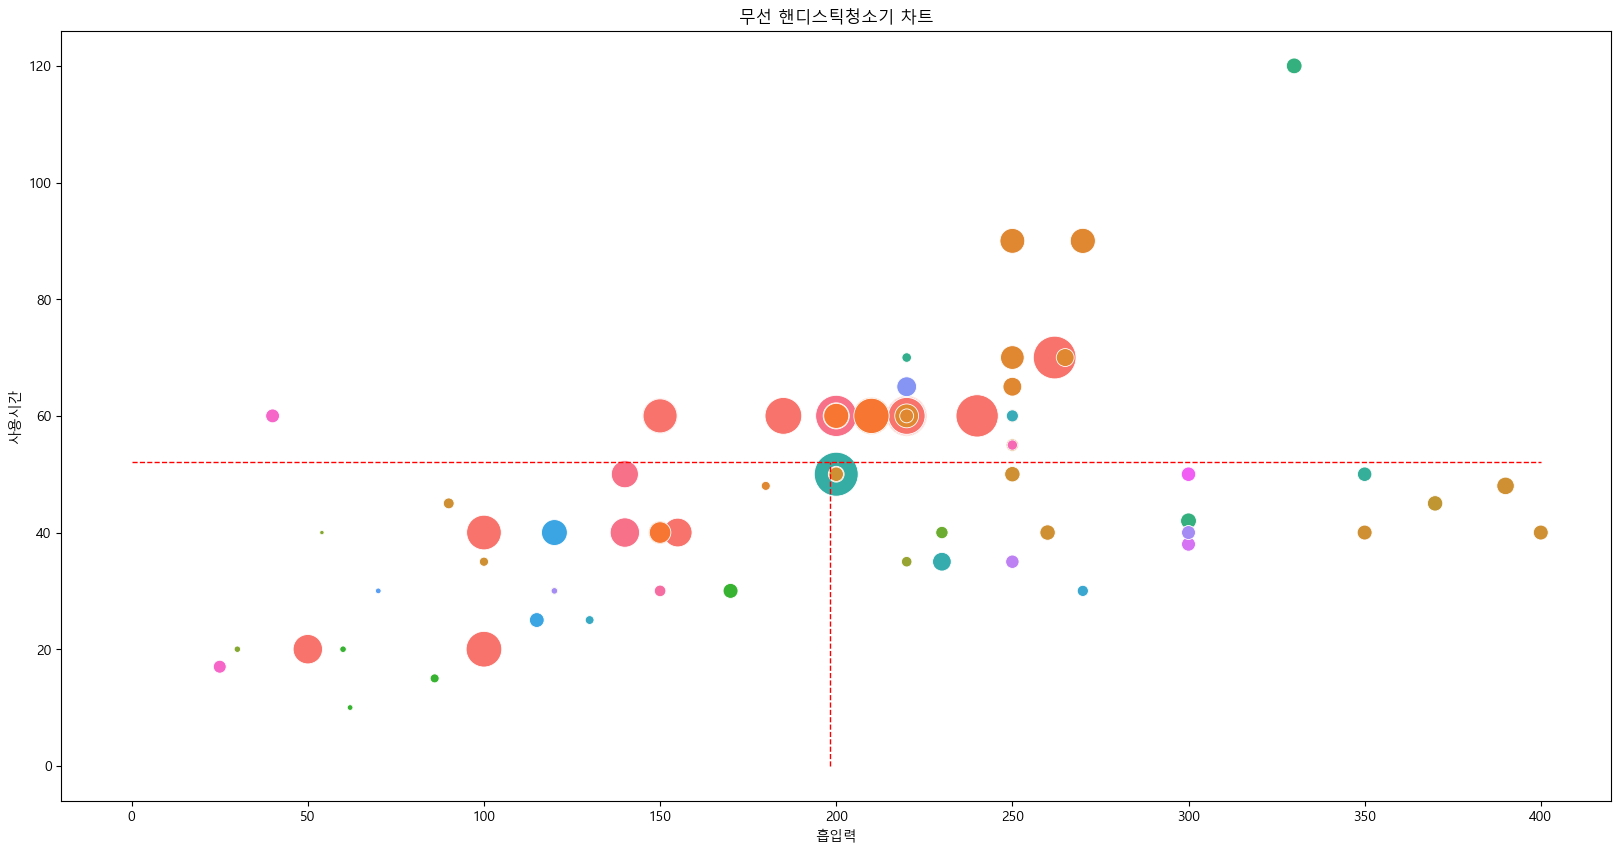

In [97]:
plt.figure(figsize = (20, 10))
plt.title('무선 핸디스틱청소기 차트')
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'], data = chart_data,
               sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value],
         [use_time_mean_value, use_time_mean_value],
         'r--',
         lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
         [0, use_time_mean_value],
         'r--',
         lw = 1)
plt.show()


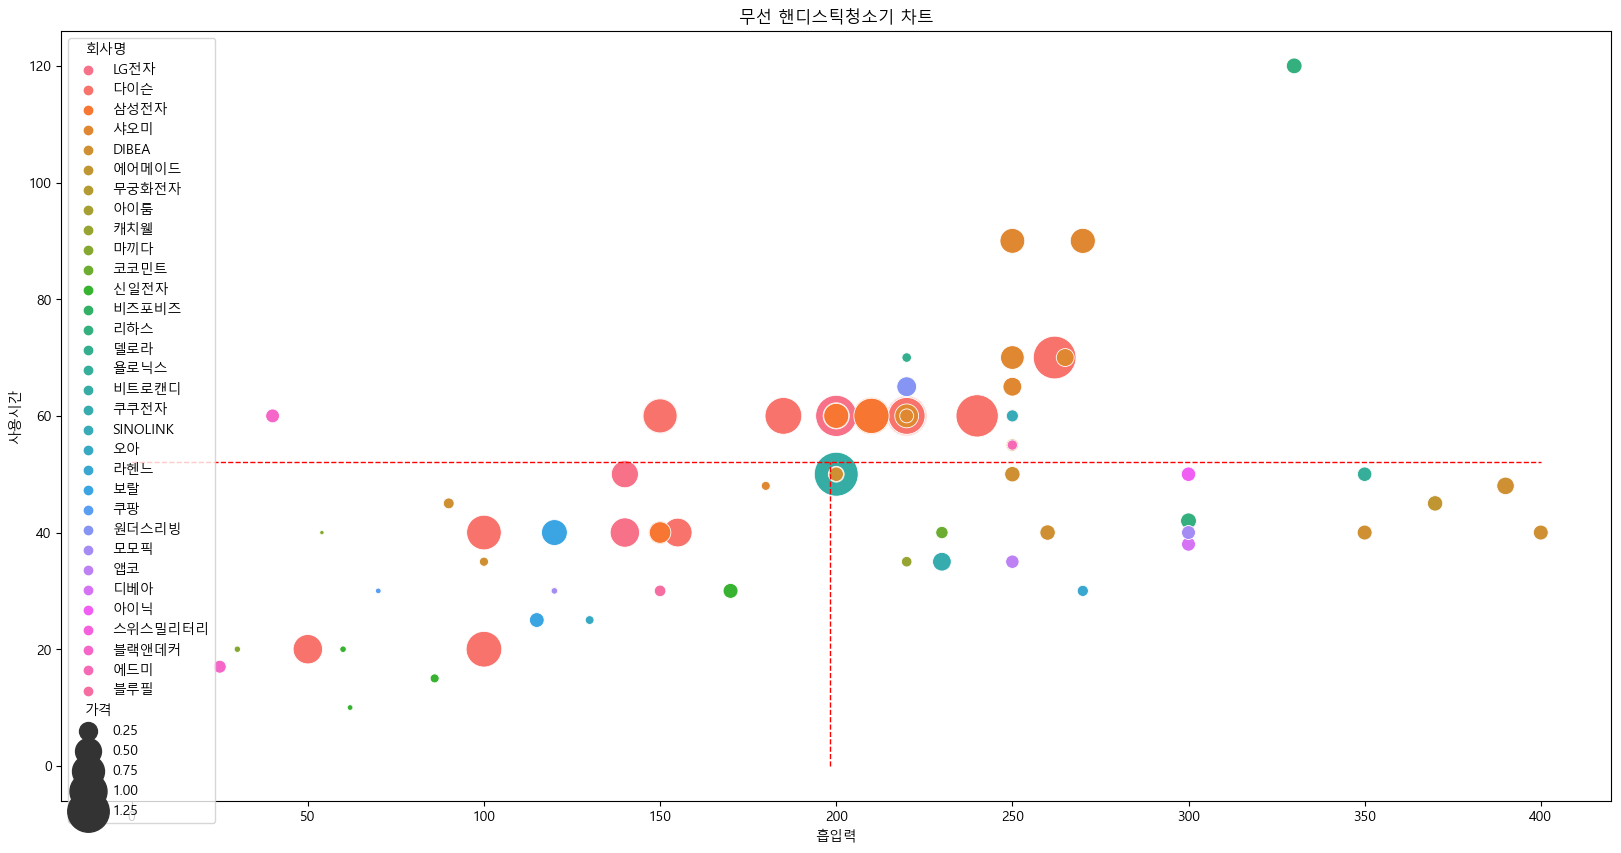

In [98]:
plt.figure(figsize = (20, 10))
plt.title('무선 핸디스틱청소기 차트')
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'], data = chart_data,
               sizes = (10, 1000), legend = True)
plt.plot([0, suction_max_value],
         [use_time_mean_value, use_time_mean_value],
         'r--',
         lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
         [0, use_time_mean_value],
         'r--',
         lw = 1)
plt.show()


- 사용시간이 길고 흡입력이 큰 제품일수록 가격이 높아지는 경향이 있음

## 인기 제품 10개 모델 시각화

In [105]:
chart_data

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1055510,60.0,220.0
1,핸디스틱청소기,다이슨,V10 플러피 오리진,404100,60.0,151.0
2,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956AX,519000,60.0,220.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,435080,60.0,210.0
6,핸디스틱청소기,LG전자,코드제로 A9S AT9200BA,573720,60.0,200.0
...,...,...,...,...,...,...
386,핸디스틱청소기,DIBEA,DW200,79450,35.0,100.0
387,핸디스틱청소기,삼성전자,제트 VS20T9253QD,468450,60.0,200.0
389,핸디스틱청소기,모모픽,MAX300,158000,40.0,300.0
395,핸디스틱청소기,블루필,몽땅 BVC201,115364,30.0,150.0


In [104]:
chart_data_selected = chart_data[:10]

In [106]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

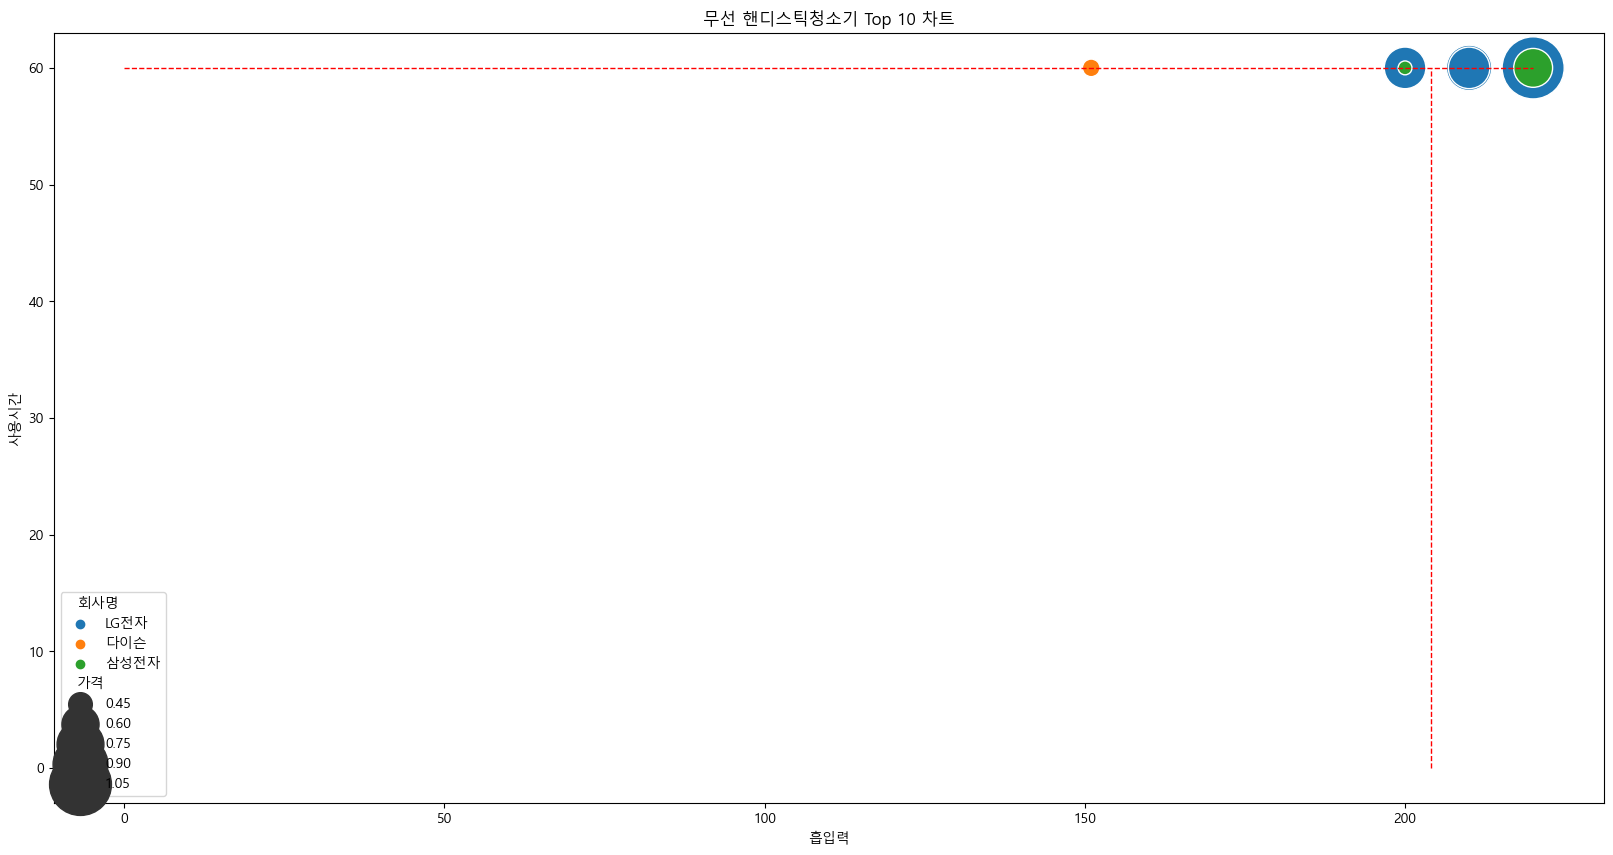

In [107]:
plt.figure(figsize = (20, 10))
plt.title('무선 핸디스틱청소기 Top 10 차트')
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data_selected['회사명'], data = chart_data_selected,
               sizes = (100, 2000), legend = True)
plt.plot([0, suction_max_value],
         [use_time_mean_value, use_time_mean_value],
         'r--',
         lw = 1)
plt.plot([suction_mean_value, suction_mean_value],
         [0, use_time_mean_value],
         'r--',
         lw = 1)


plt.show()
